<a href="https://colab.research.google.com/github/hrithik000/Hotel_booking_Analysis/blob/main/AirBin_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
### This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.
### Explore and analyze the data to discover key understandings (not limited to these) such as :
### What can we learn about different hosts and areas?
### What can we learn from predictions? (ex: locations, prices, reviews, etc)
### Which hosts are the busiest and why?
### Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path = "/Airbnb NYC 2019.csv"
df = pd.read_csv(path)

Data prifiling and cleaning

In [7]:
df.shape

(22059, 16)

In [8]:


df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


In [9]:




df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22054,17744351,1 Bd furnished Bayridge Brooklyn NY,119029523,Ebada,Brooklyn,Fort Hamilton,40.62241,-74.02863,Entire home/apt,115.0,4.0,3.0,2019-05-19,0.48,3.0,295.0
22055,17746222,Perfect bedroom. Near Subways Columbia CityCol...,16721721,Federico,Manhattan,Harlem,40.81530,-73.95080,Private room,65.0,2.0,18.0,2018-11-04,0.64,1.0,0.0
22056,17748284,Guest BedRm in quaint NYC neighborhood. NEAR T...,25196982,Nikolas,Queens,Astoria,40.76924,-73.91702,Private room,65.0,1.0,11.0,2019-06-17,3.24,1.0,9.0
22057,17749273,1 br Woodside - close to LGA!,121096858,Caressa,Queens,Woodside,40.74176,-73.90631,Private room,35.0,1.0,0.0,NaN,NaN,1.0,0.0
22058,17750238,Great room in a spacious Inwood Apartment,13860679,Max,Manhattan,Inwood,40.86348,-73.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.205900e+04,2.205900e+04,22059.000000,22059.000000,22058.000000,22058.000000,22058.000000,18358.000000,22058.000000,22058.000000
mean,8.511062e+06,2.447159e+07,40.729520,-73.956852,151.245852,7.408151,35.785248,0.944976,3.721688,103.508614
std,5.258526e+06,2.707545e+07,0.053118,0.039701,235.534537,23.883845,58.826793,1.297014,12.938362,132.634612
min,2.539000e+03,2.571000e+03,40.499790,-74.242850,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,3.996390e+06,3.977023e+06,40.689765,-73.983265,73.000000,2.000000,1.000000,0.100000,1.000000,0.000000
50%,8.520836e+06,1.428111e+07,40.723370,-73.958010,110.000000,3.000000,9.000000,0.360000,1.000000,9.000000
75%,1.324998e+07,3.657868e+07,40.763950,-73.941490,175.000000,5.000000,45.000000,1.310000,2.000000,221.000000
max,1.775024e+07,1.210969e+08,40.908040,-73.000000,10000.000000,1250.000000,629.000000,16.220000,121.000000,365.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22059 entries, 0 to 22058
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22059 non-null  int64  
 1   name                            22044 non-null  object 
 2   host_id                         22059 non-null  int64  
 3   host_name                       22045 non-null  object 
 4   neighbourhood_group             22059 non-null  object 
 5   neighbourhood                   22059 non-null  object 
 6   latitude                        22059 non-null  float64
 7   longitude                       22059 non-null  float64
 8   room_type                       22058 non-null  object 
 9   price                           22058 non-null  float64
 10  minimum_nights                  22058 non-null  float64
 11  number_of_reviews               22058 non-null  float64
 12  last_review                     

lots of null vales in this data

In [12]:
df.isnull().sum()

id                                   0
name                                15
host_id                              0
host_name                           14
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            1
price                                1
minimum_nights                       1
number_of_reviews                    1
last_review                       3701
reviews_per_month                 3701
calculated_host_listings_count       1
availability_365                     1
dtype: int64

In [13]:

# Assuming you have a DataFrame named 'df'
column_names = df.columns.tolist()
print(column_names)


['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


We have 4 columns contain a missing value. Now, we drop unnecessary columns such as id, name,last_review.

In [14]:
number_of_room_type = df['room_type'].unique()
print(number_of_room_type)


['Private room' 'Entire home/apt' 'Shared room' nan]


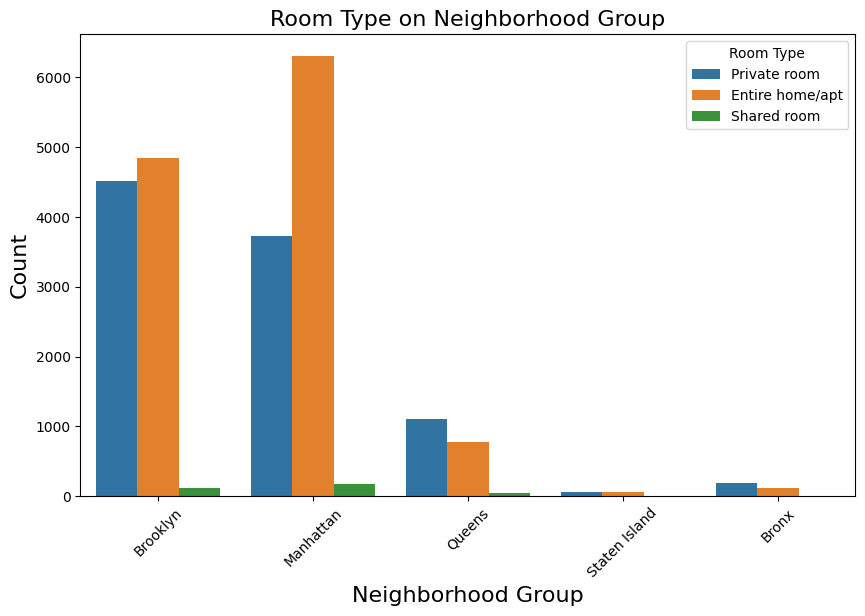

In [15]:

plt.figure(figsize=(10, 6))
plt.title("Room Type on Neighborhood Group", fontsize=16)
sns.countplot(data=df, x='neighbourhood_group', hue='room_type')
plt.xlabel("Neighborhood Group", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='Room Type')
plt.show()


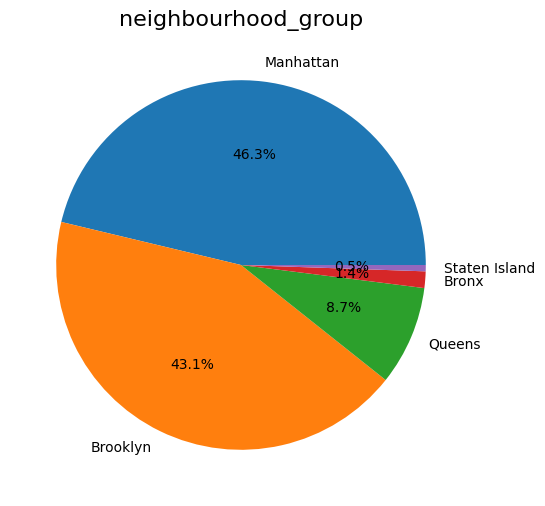

In [16]:
plt.figure(figsize=(10,6))
plt.title("neighbourhood_group",fontsize = 16)
plt.pie(df.neighbourhood_group.value_counts(), labels=df.neighbourhood_group.value_counts().index,autopct='%1.1f%%')
plt.show()

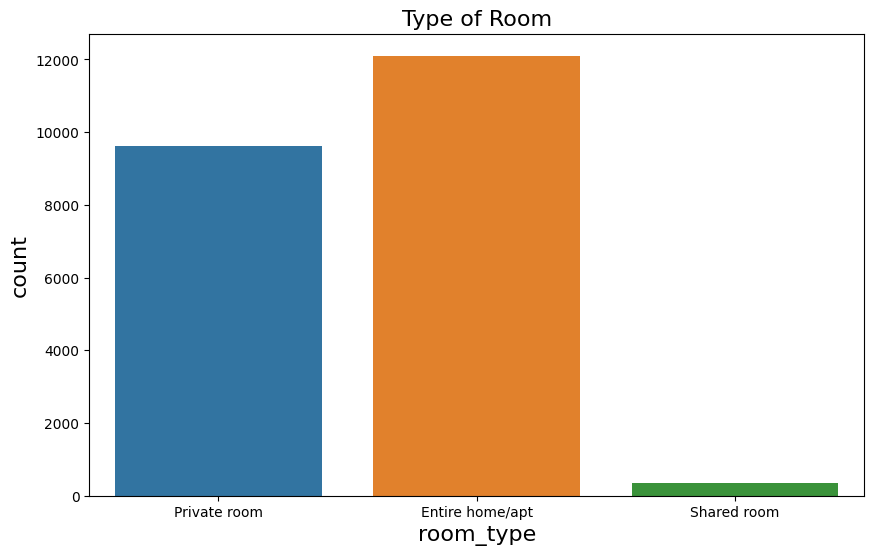

In [17]:
plt.figure(figsize=(10,6))
plt.title("Type of Room",fontsize = 16)
sns.countplot(data=df,x='room_type')
plt.xlabel("room_type",fontsize=16)
plt.ylabel("count",fontsize=16)
plt.show()

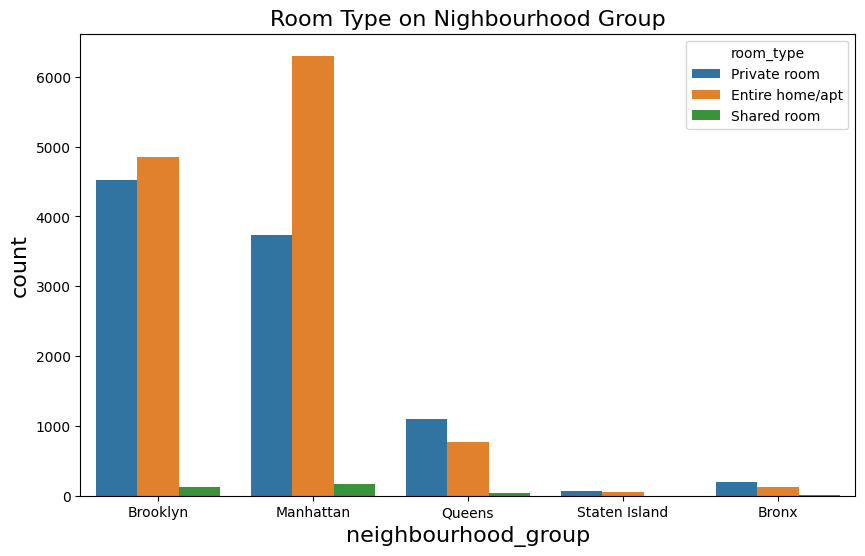

In [18]:
plt.figure(figsize=(10,6))
plt.title("Room Type on Nighbourhood Group",fontsize=16)
sns.countplot(data=df,x='neighbourhood_group',hue=df.room_type)
plt.xlabel("neighbourhood_group",fontsize=16)
plt.ylabel("count",fontsize=16)
plt.show()

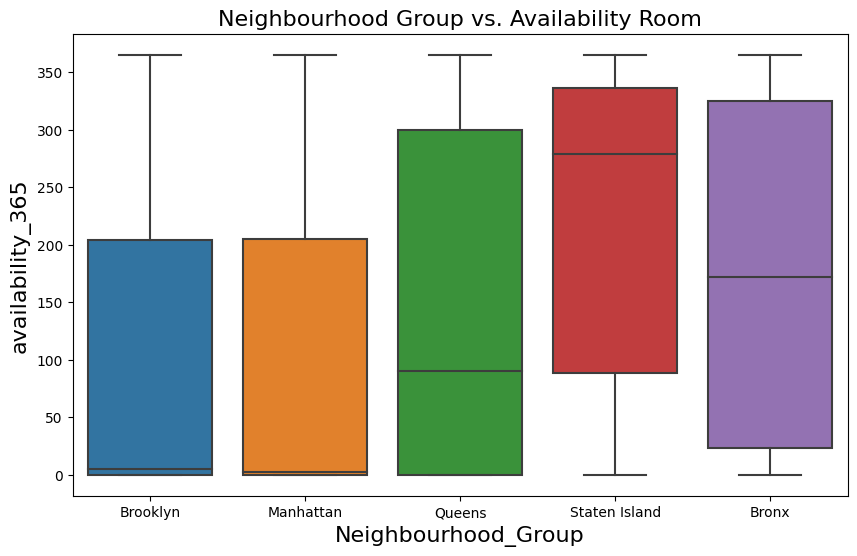

In [23]:
#availability per year
plt.figure(figsize=(10,6))
plt.title("Neighbourhood Group vs. Availability Room",fontsize=16)
sns.boxplot(data=df, x='neighbourhood_group',y='availability_365')
plt.xlabel('Neighbourhood_Group' , fontsize=16)
plt.ylabel('availability_365', fontsize=16)
plt.show()

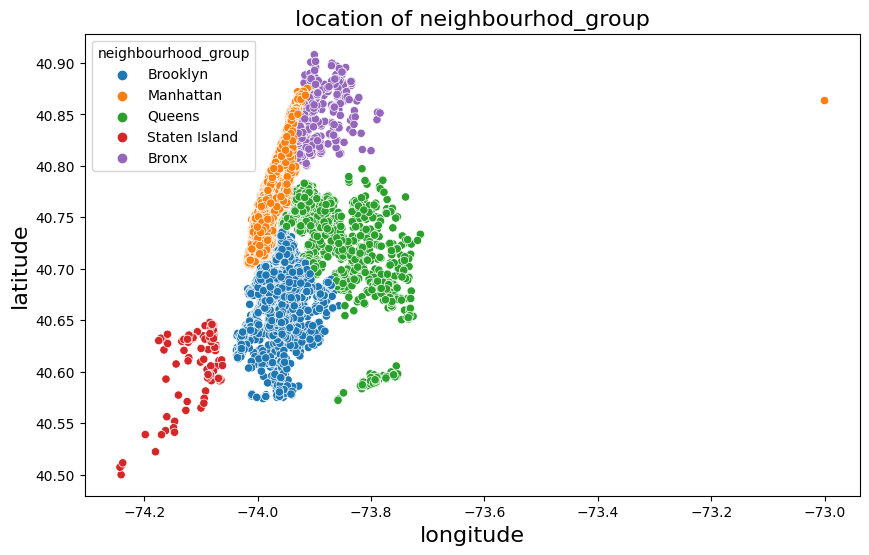

In [24]:
#locations
plt.figure(figsize=(10,6))
sns.scatterplot( x = df.longitude,y=df.latitude,hue=df.neighbourhood_group)
plt.xlabel("longitude", fontsize=16)
plt.ylabel("latitude",fontsize=16)
plt.title("location of neighbourhod_group",fontsize=16)
plt.show()

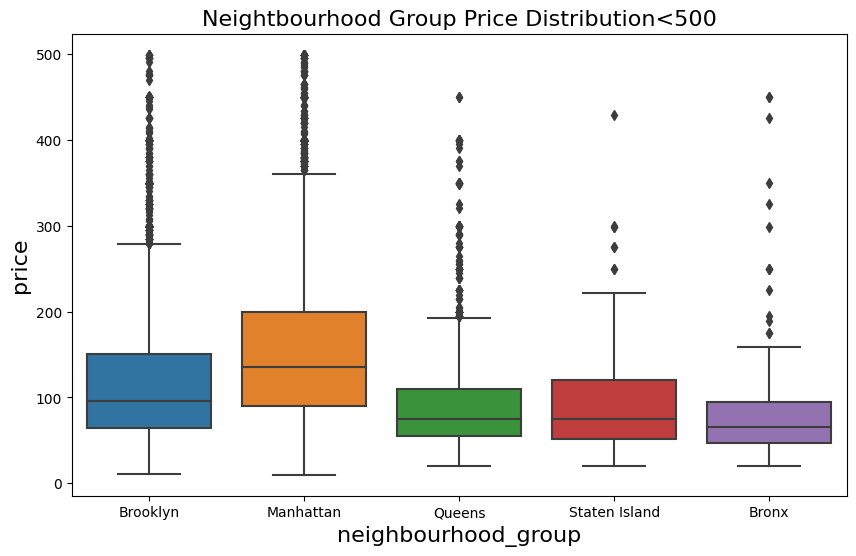

In [30]:
#prices per location
plt.figure(figsize=(10,6))
plt.title("Neightbourhood Group Price Distribution<500",fontsize=16)
sns.boxplot(y="price",x='neighbourhood_group',data = df[df.price<500])
plt.xlabel("neighbourhood_group",fontsize=16)
plt.ylabel("price",fontsize=16)
plt.show()

In [31]:
#locations with total reviews
location_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].sum().reset_index()
location_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,16086.0
1,Brooklyn,348921.0
2,Manhattan,326460.0
3,Queens,90918.0
4,Staten Island,6966.0


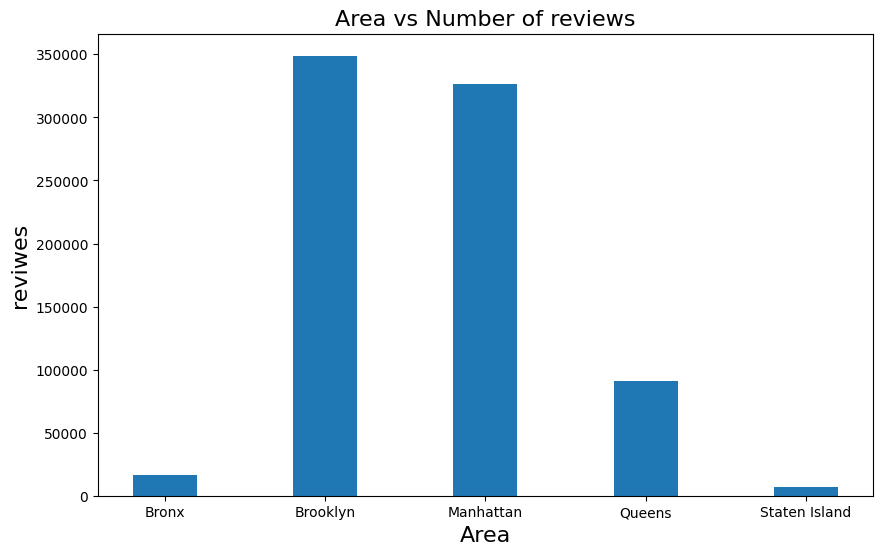

In [44]:
#number of reviews per area
area = location_reviews['neighbourhood_group']
review = location_reviews['number_of_reviews']

fig = plt.figure(figsize = (10,6))
plt.bar(area,review , width = 0.4)
plt.title("Area vs Number of reviews",fontsize=16)
plt.xlabel("Area",fontsize=16)
plt.ylabel("reviwes",fontsize=16)
plt.show()


In [45]:
#price preditions with the help of reviews
price_area = df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_reviews=price_area.head(5)
price_reviews

,price,number_of_reviews
0,10.0,0.0
1,11.0,113.0
2,12.0,0.0
3,16.0,43.0
4,18.0,0.0


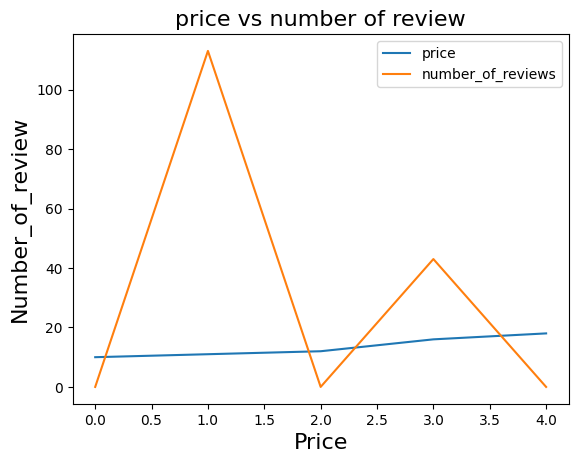

In [46]:
#prices and review relation
price_reviews.plot()
plt.title('price vs number of review',fontsize = 16)
plt.xlabel("Price",fontsize = 16)
plt.ylabel("Number_of_review",fontsize = 16)
plt.show()

In [48]:
#top five busiest hosts
busiest_hosts = df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head()
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
5067,Dona,47621202,Private room,629.0
8696,Jj,4734398,Private room,607.0
12535,Maya,37312959,Private room,543.0
3062,Carol,2369681,Private room,540.0
4422,Danielle,26432133,Private room,510.0


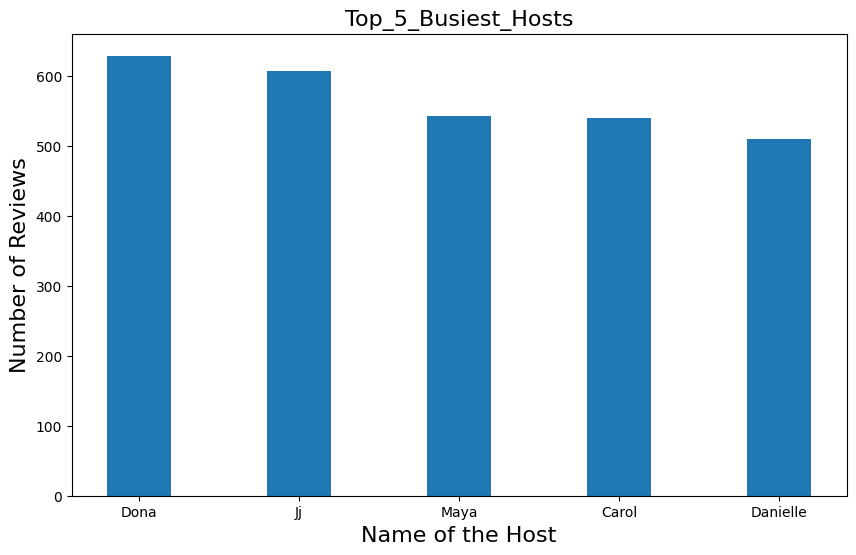

In [49]:
#top most hosts were maximum booking
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (10,6))
plt.bar(name, reviews ,width = 0.4)
plt.xlabel("Name of the Host",fontsize = 16)
plt.ylabel("Number of Reviews",fontsize = 16)
plt.title("Top_5_Busiest_Hosts",fontsize = 16)
plt.show()

In [50]:
#maximum bookings in hotelst type with locations
traffic_areas = df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,6303
3,Brooklyn,Entire home/apt,4850
4,Brooklyn,Private room,4523
7,Manhattan,Private room,3728
10,Queens,Private room,1105
9,Queens,Entire home/apt,771
1,Bronx,Private room,192
8,Manhattan,Shared room,172
5,Brooklyn,Shared room,124
0,Bronx,Entire home/apt,119


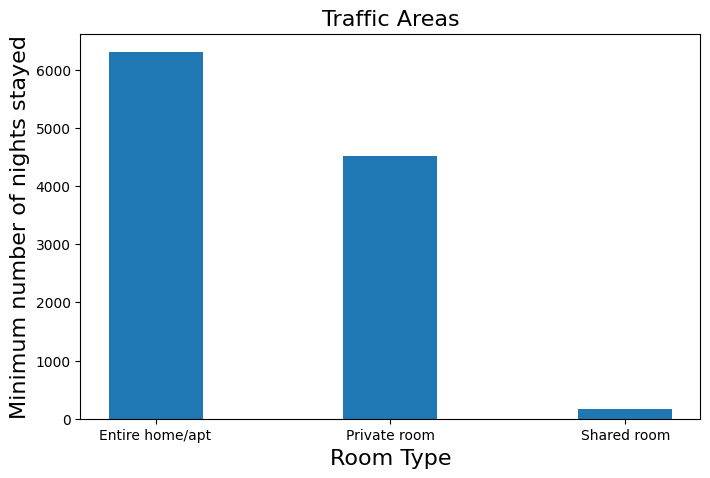

In [51]:
#traffic areas in hotel type
room_type = traffic_areas['room_type']
stayed = traffic_areas['minimum_nights']

fig = plt.figure(figsize = (8,5))
plt.bar(room_type, stayed,width = 0.4)
plt.xlabel("Room Type",fontsize = 16)
plt.ylabel("Minimum number of nights stayed",fontsize = 16)
plt.title("Traffic Areas",fontsize = 16)
plt.show()

# Conclusion: 1--The people who prefer to stay in an Entire home or Apartment are going to stay a bit longer in that particular Neighborhood only.

# 2--The people who prefer to stay in a Private room won't stay longer as compared to a Home or Apartment.

# 3-- Most people prefer to pay less price.

# 4--If there are more number of reviews for a particular neighborhood group that means that a place is a tourist place.

# 5--If people are not staying more than one night means they are travelers.

# 6--For the given data set I found that there are a total of 221 different areas out of which “Williamsburg” has a maximum number of listings.

# 7--There are a total of 37457 hosts and the host with host id- 219517861 “Sonder” is the top host with 327 listings.

# 8--No strong correlation was observed between price, reviews, and location.

# 9--Out of 5 different locations in the dataset, Manhattan is the most crowded location with 44.3% of listings.

## 10--Top five busiest host are Dona,Jj,Maya,Carol,Danielle